# The file to extract the anyon dimension

In [3]:
"""Laurent-polynomial helpers and ABC geometry builder."""

from __future__ import annotations

from pathlib import Path
import sys

# Put src/ on the import path so sibling imports work.
sys.path.insert(0, str(Path("../src").resolve()))

from typing import Tuple


import matplotlib.pyplot as plt

Site = Tuple[int, int]

from CMI_anyondim import *


## Test site

(<Figure size 600x600 with 1 Axes>, <Axes: xlabel='x', ylabel='y'>)

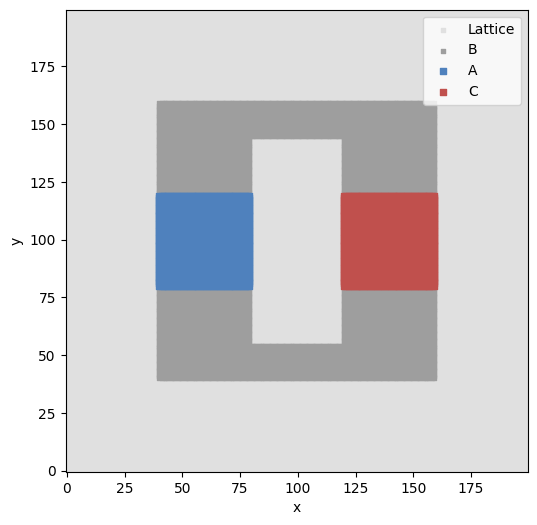

In [4]:
L = 200
lABC = 40
Lv1 = lABC  
Lv2 = lABC
Lv3 = lABC - 15
Lh1 = lABC
Lh2 = lABC

omega_full = build_full_lattice_sites(L)
omega, A_sites, B_sites, C_sites, meta = build_geometry_ABC(
    Lv1, Lv2, Lv3, Lh1, Lh2, lattice_size=L
)
plot_regions(
    A_sites,
    B_sites,
    C_sites,
    W=L,
    H=L,
    full_sites=omega_full,
    # save_path="abc_regions.png",
)

In [7]:
f = LaurentPoly.from_terms([(0,0),(1,0),(-1,3)])
g = LaurentPoly.from_terms([(0,0),(0,1),(3,-1)])

L = 200
lABC = 40
Lv1 = lABC  
Lv2 = lABC
Lv3 = lABC - 15
l_list = [-15, -12, -8, -4, -2, 0, 2, 4, 8, 12, 15]
# l_list = [-15, -12, -8, -4, -2, 0, 2, 4, 8]
l_list, I_AB_Cboth_list, I_AB_Cedge1_list, I_AB_Cedge2_list, file_stub = main_CMI(f, g, L, Lv1, Lv2, Lv3, lABC, l_list)

L = 200
Lv1 =40, Lv2 =40, Lv3 =25
l=-15, Lh1=25, Lh2=25
I(A:C_{vh}|B)= 16
I(A:C_{v}|B)= 0
I(A:C_{h}|B)= 0
l=-12, Lh1=28, Lh2=28
I(A:C_{vh}|B)= 16
I(A:C_{v}|B)= 1
I(A:C_{h}|B)= 1
l=-8, Lh1=32, Lh2=32
I(A:C_{vh}|B)= 16
I(A:C_{v}|B)= 8
I(A:C_{h}|B)= 8
l=-4, Lh1=36, Lh2=36
I(A:C_{vh}|B)= 16
I(A:C_{v}|B)= 8
I(A:C_{h}|B)= 8
l=-2, Lh1=38, Lh2=38
I(A:C_{vh}|B)= 16
I(A:C_{v}|B)= 8
I(A:C_{h}|B)= 8
l=0, Lh1=40, Lh2=40
I(A:C_{vh}|B)= 16
I(A:C_{v}|B)= 8
I(A:C_{h}|B)= 8
l=2, Lh1=42, Lh2=42
I(A:C_{vh}|B)= 16
I(A:C_{v}|B)= 8
I(A:C_{h}|B)= 8
l=4, Lh1=44, Lh2=44
I(A:C_{vh}|B)= 16
I(A:C_{v}|B)= 8
I(A:C_{h}|B)= 8
l=8, Lh1=48, Lh2=48
I(A:C_{vh}|B)= 16
I(A:C_{v}|B)= 8
I(A:C_{h}|B)= 8
l=12, Lh1=52, Lh2=52
I(A:C_{vh}|B)= 16
I(A:C_{v}|B)= 8
I(A:C_{h}|B)= 8
l=15, Lh1=55, Lh2=55
I(A:C_{vh}|B)= 16
I(A:C_{v}|B)= 8
I(A:C_{h}|B)= 8
l_list = [-15, -12, -8, -4, -2, 0, 2, 4, 8, 12, 15]
I_(A:Cv|B)_list = [0, 1, 8, 8, 8, 8, 8, 8, 8, 8, 8]
I_(A:Ch|B)_list = [0, 1, 8, 8, 8, 8, 8, 8, 8, 8, 8]
I_(A:Cvh|B)_list = [16, 16, 16,

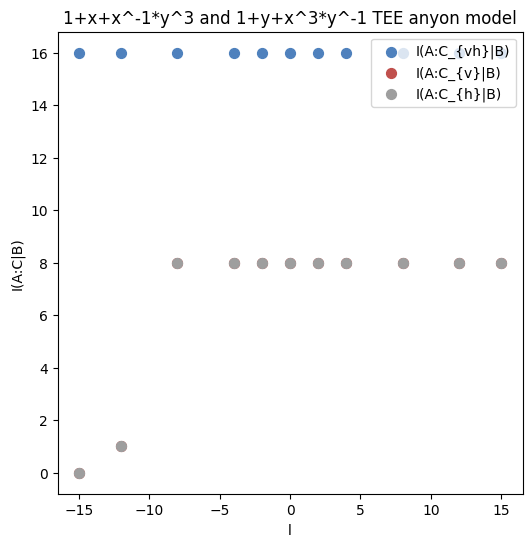

In [8]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(l_list, I_AB_Cboth_list, s=50, marker="o", color="#4f81bd",  label=r"I(A:C_{vh}|B)")
ax.scatter(l_list, I_AB_Cedge1_list, s=50, marker="o", color="#c0504d", label=r"I(A:C_{v}|B)")
ax.scatter(l_list, I_AB_Cedge2_list, s=50, marker="o", color="#9e9e9e", label=r"I(A:C_{h}|B)")
f_str = laurent_poly_string(f)
g_str = laurent_poly_string(g)
ax.set_xlabel("l")
ax.set_ylabel("I(A:C|B)")
ax.legend(loc="upper right")
ax.set_title(f"{f_str} and {g_str} TEE anyon model")
fig.savefig(f"{file_stub}.png", dpi=200, bbox_inches="tight")